# LASSO using SciKit-Learn
----   

## How does LASSO differ from Ridge?
In the previous tutorial, we learnt about the concept of regularization using ridge regression as an example. Ridge regression is capable of shrinking coefficients *towards* zero, but will still use all predictors in the model.   

Lasso is a relatively recent adaptation of ridge which is capable of dropping predictors entirely.   

A lasso model is fit under the constraint of minimizing the following equation:   
$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$   

$$RSS + \alpha\sum_{j=1}^p|b_j|$$

In ridge regression, the penalty parameter is applied to the sum of the squares of the coefficients. In lasso, the penalty parameter is applied to the sum of the absolute values of the coefficients.   

The advantage of lasso is that it performs subset selection in addition to shrinkage. We won't go into detail about the ability of the lasso to perform variable selection here, but if you are interested, watch [this video](https://youtu.be/A5I1G1MfUmA?t=363) from about 6:00 onwards.

## Getting started
With that little bit of theory out of the way, it's time to use the lasso in sklearn!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

## Preprocessing
We'll be using the same dataset and train/test split as in previous regression tutorials, and again we will need to standardize the data before it can be used in our lasso model.

In [4]:
X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

In [12]:
from sklearn.linear_model import Lasso

In [13]:
lasso = Lasso(alpha=0.01)

In [14]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
intercept = float(lasso.intercept_)

In [16]:
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [17]:
print("Intercept:", float(intercept))

Intercept: 10.043117246931182


In [18]:
coeff

,Coefficient
Value of Exports (USD),-0.542056
Value of Exports (ZAR),1.070156
Value of Imports (USD),-0.830049
Value of Imports (ZAR),1.188285
Total Reserves excl Gold (USD),0.000000
IMF Reserve Position (USD),0.000000
Foreign Exchange (USD),0.065942
Claims on Non-residents (USD),0.000000
Liabilities to Non-residents (USD),0.024812
Central Bank Policy Rate,0.000000


### Interpretation of the intercept and coefficients
We interpret the values of the intercept and coefficients the same way as before:
 * The intercept can be interpreted as the **expected exchange rate when all the features are equal to their means**.
 * Each coefficient is interpreted as the expected change in the response variable given an increase of 1 in the **scaled feature value**.
 
We can see from the list of coefficients above that some of the coefficients have indeed been shrunk to exactly zero.

## Assessment of predictive accuracy
Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. For comparisonm we'll quickly fit a linear model using the subset of variables as chosen by the lasso model.

In [19]:
# fit a basic linear model
from sklearn.linear_model import LinearRegression

X_subset = df.drop(['ZAR/USD',
                   'Total Reserves excl Gold (USD)',
                   'IMF Reserve Position (USD)',
                   'Claims on Non-residents (USD)',
                   'Central Bank Policy Rate',
                   'Treasury Bill Rate',
                   'Savings Rate',
                   'Deposit Rate',
                   'Lending Rate',
                   'Government Bonds'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                        y, 
                                                        test_size=0.20, 
                                                        shuffle=False)

lm = LinearRegression()

lm.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
from sklearn import metrics

In [30]:
# check training accuracy
train_lm = lm.predict(X_train2)
train_lasso = lasso.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train2, train_lm))
print('Lasso :', metrics.mean_squared_error(y_train, train_lasso))

Training MSE
Linear: 0.0416672061587
Lasso : 0.0466723532958


In [21]:
test_lm = lm.predict(X_test2)
test_lasso = lasso.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test2, test_lm))
print('Lasso :', metrics.mean_squared_error(y_test, test_lasso))

Testing MSE
Linear: 0.7007105218146049
Lasso : 0.5864683248588142


### Comment:
From the results above, we can see that lasso was able to perform subset selection, while also performing shrinkage. The result is a more generalised model with greater predictive capacity.   

Let's plot our results to end off.

In [22]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

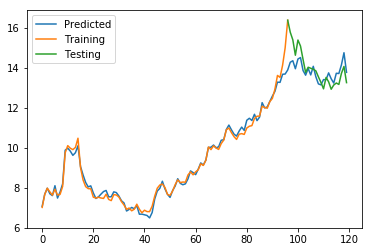

In [24]:
plt.plot(np.arange(len(y)), lasso.predict(X_scaled), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()